In [1]:
!pip install mtcnn


     ---------------------------------------- 2.3/2.3 MB 4.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

Util Functions


1.getJSON Function fetches the json file.


In [2]:
with_mask='with_mask'
without_mask='without_mask'
pd.DataFrame([len(os.listdir(with_mask)),len(os.listdir(without_mask))],columns=['Number'],index=['with_mask','without_mask'])

Number
with_mask       3725
without_mask    3828

Gamma correction is a nonlinear operation used to encode and decode luminance values in video or still image systems. It is used to instill some light in the image. If gamma < 1, image will shift towards darker end of the spectrum and when gamma > 1, there will be more light in the image.

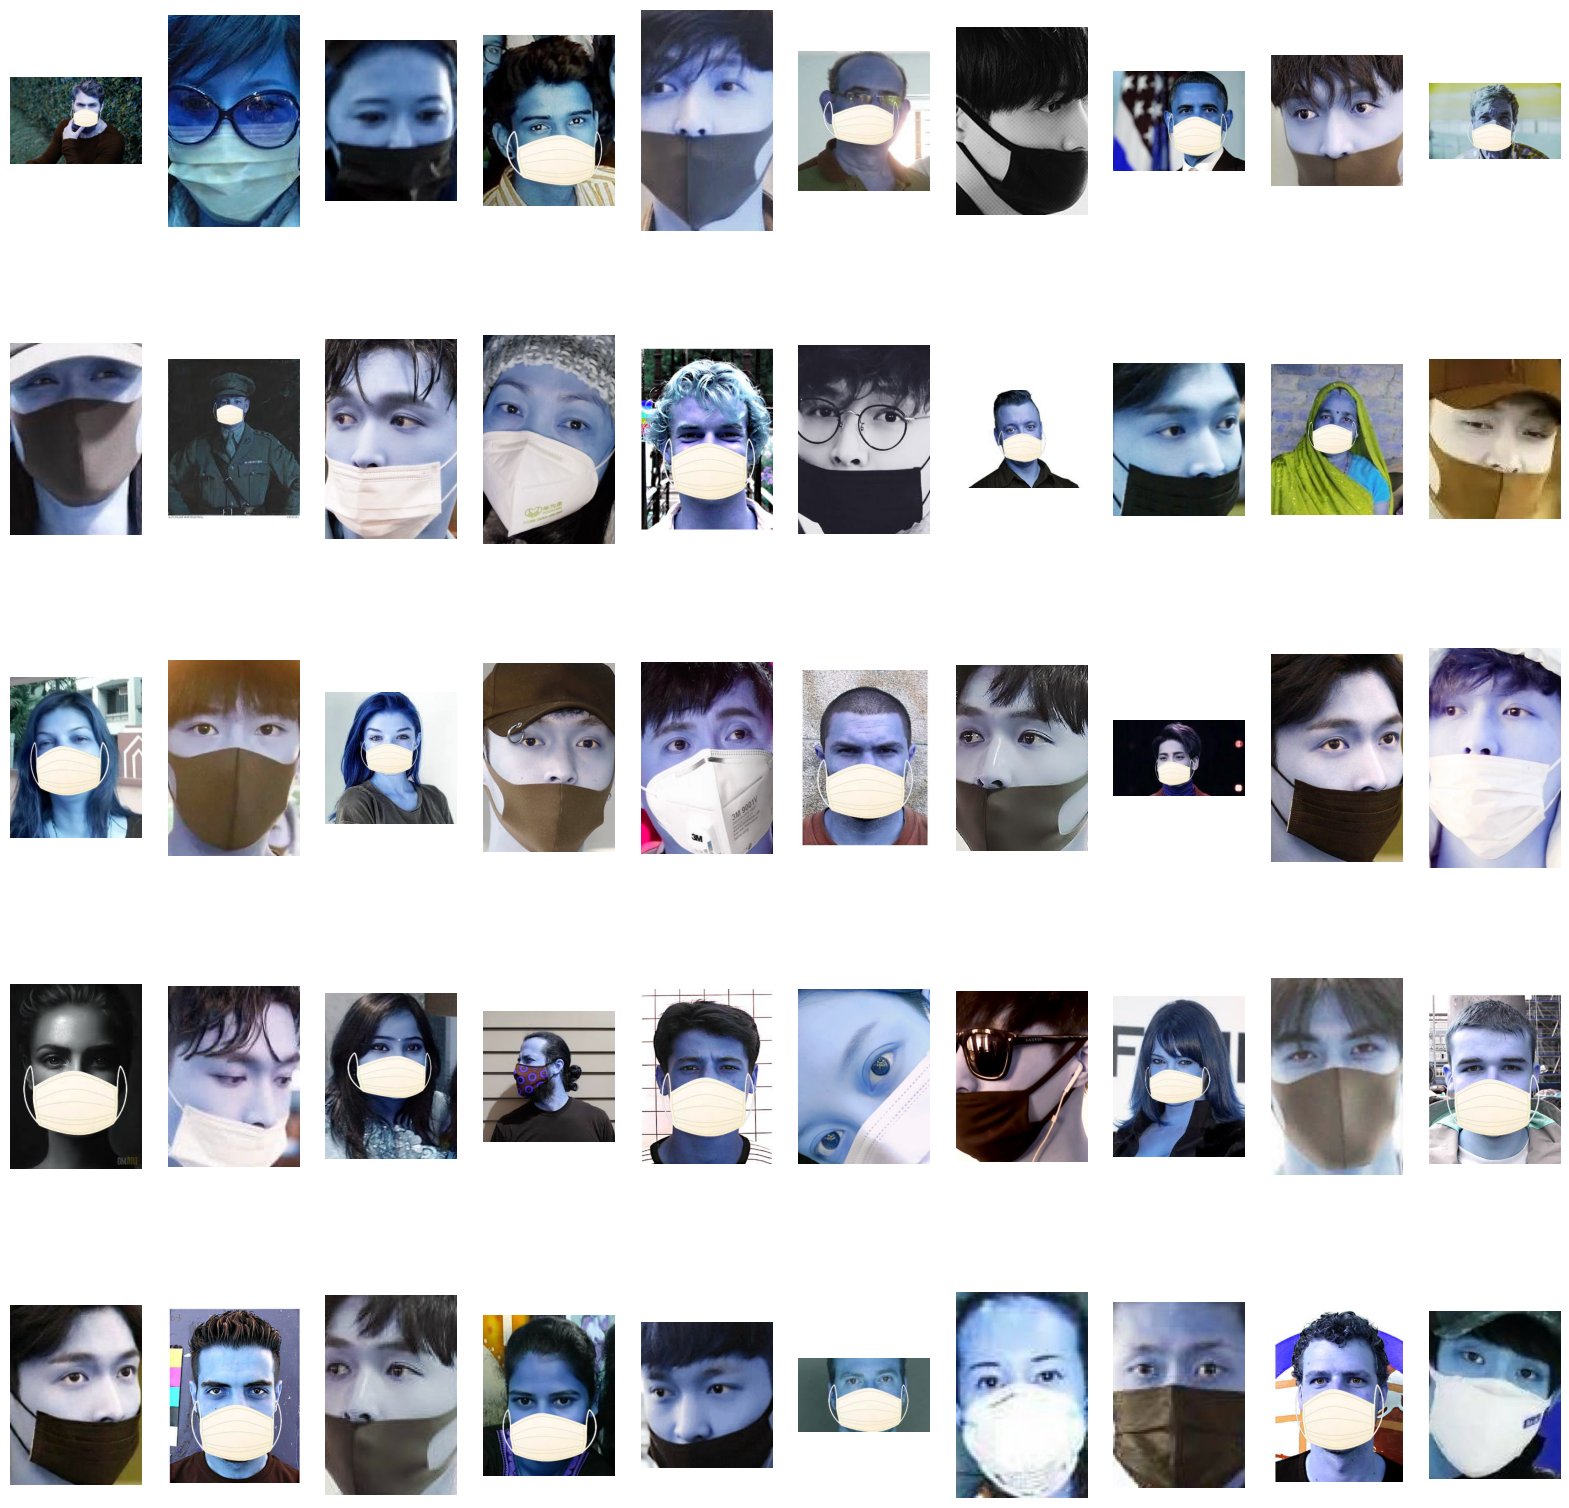

In [3]:
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(with_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(with_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

Data Preprocessing

When we're lookong into training JSON data, we can find out the next:

Anntoations fiels holds data about faces as a coorsinates of rectagular area
Also each annotation holds name of the class, We;re interested in "face_with_mask" and "face_no_mask" classes.

Lets' see sample data from training set.

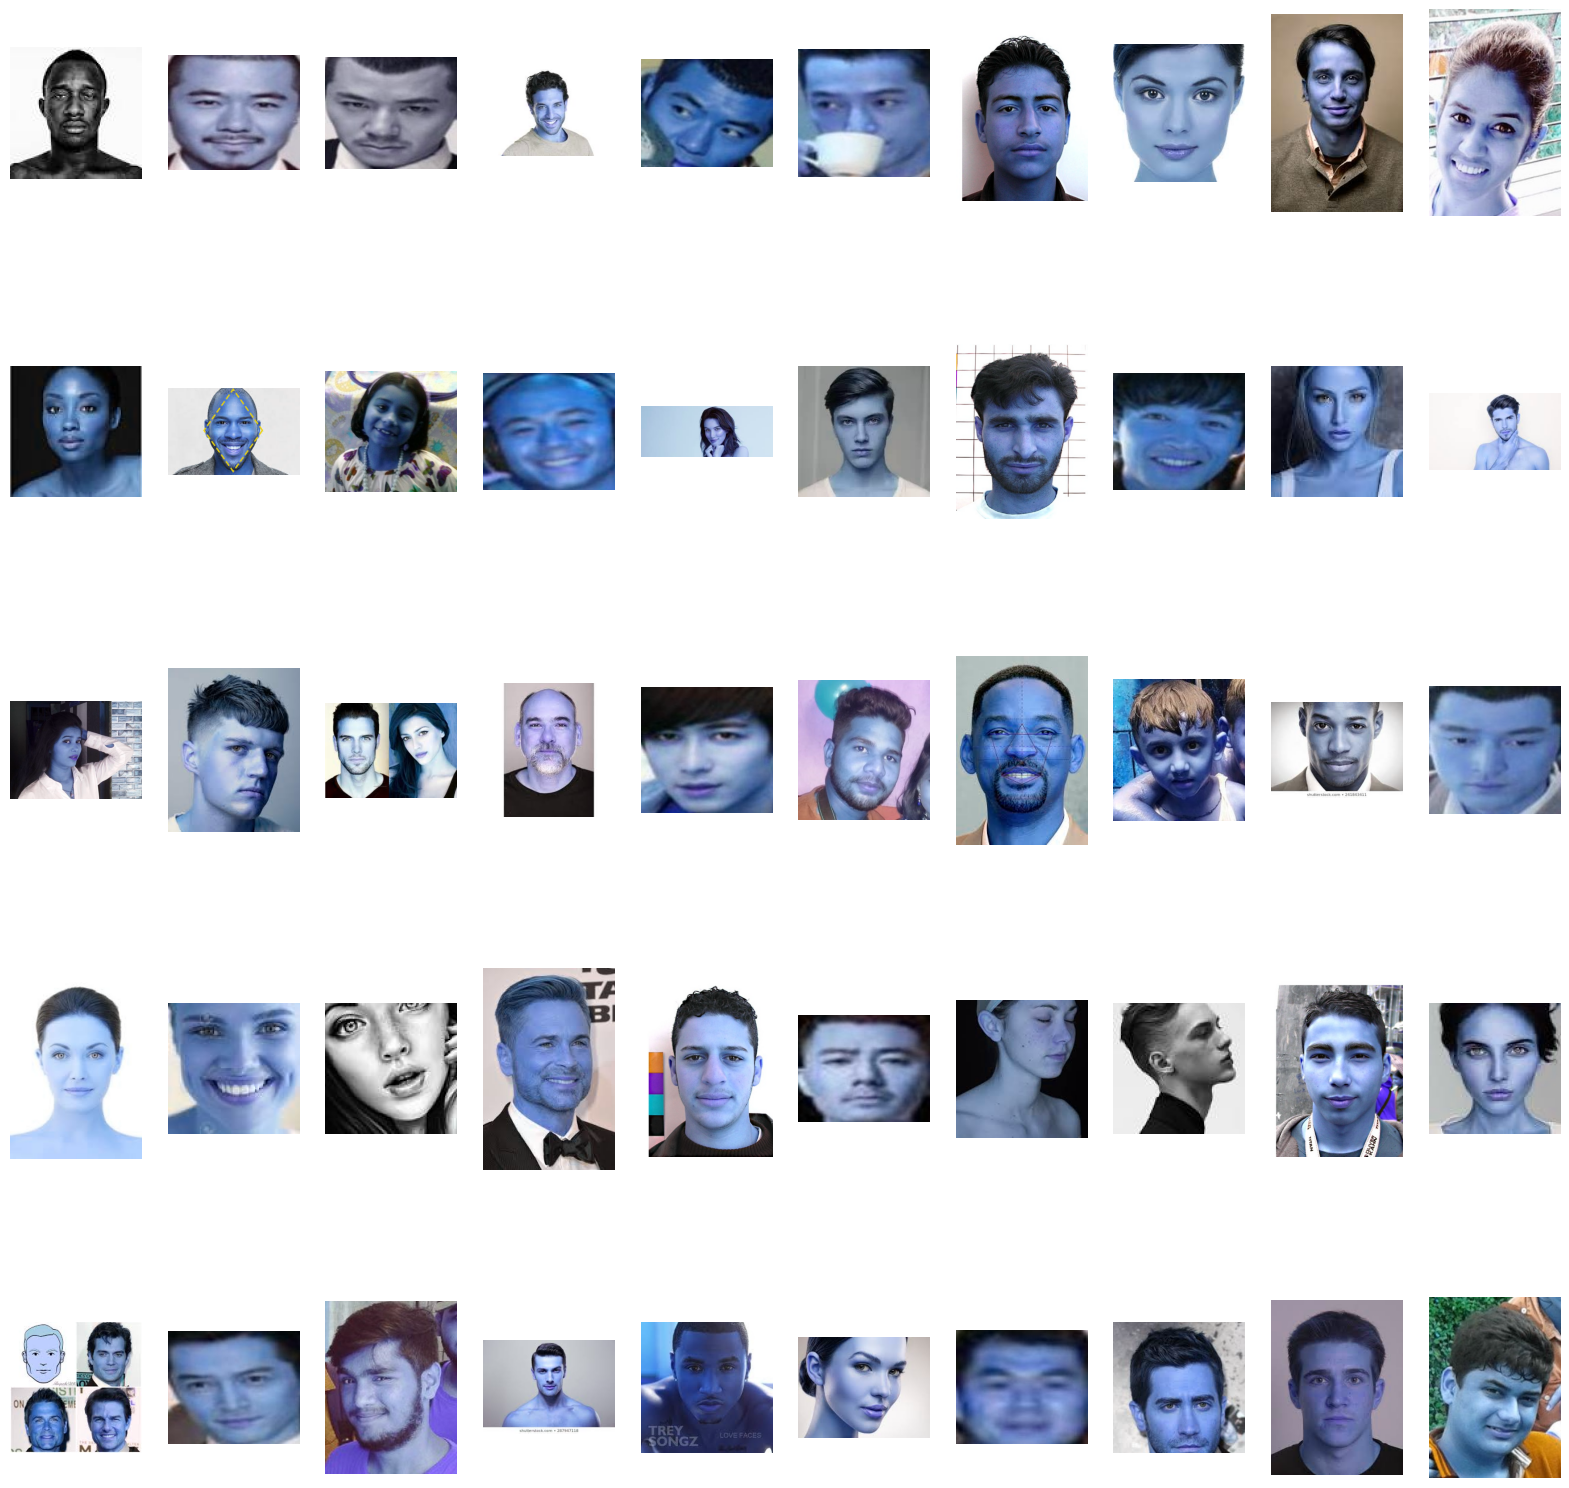

In [4]:
#Show Without Mask Image
i=1
plt.figure(figsize=(20,20))
for img in os.listdir(without_mask):
    if i==51:
        break
    plt.subplot(5,10,i)
    img_arr=cv2.imread(os.path.join(without_mask,img))
    plt.imshow(img_arr)
    i+=1
    plt.axis('off')

In [5]:
label=[]
data=[]
size=[]
#with mask label 1
for img in os.listdir(with_mask):
    img_arr=cv2.imread(os.path.join(with_mask,img))
    data.append(img_arr)
    label.append(1)
    size.append(img_arr.shape)
#without mask label 0
for img in os.listdir(without_mask):
    img_arr=cv2.imread(os.path.join(without_mask,img))
    data.append(img_arr)
    label.append(0)
    size.append(img_arr.shape)

In [6]:
pd.DataFrame(pd.Series(size).value_counts(),columns=['Number'])   


Number
(225, 225, 3)     664
(428, 320, 3)     381
(275, 183, 3)     255
(100, 100, 3)     207
(183, 275, 3)     181
...               ...
(192, 127, 3)       1
(218, 218, 3)       1
(422, 759, 3)       1
(413, 600, 3)       1
(135, 156, 3)       1

[2692 rows x 1 columns]

In [7]:
#Resize Image
Size=128
for x in range(len(data)):
    data[x]=cv2.resize(data[x],(Size,Size))

In [8]:
data=np.array(data)
label=np.array(label)
X_train,X_test,y_train,y_test=train_test_split(data,label,test_size=.15,shuffle=True,random_state=44)
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (6420, 128, 128, 3)
X Test Shape is : (1133, 128, 128, 3)
Y Train Shape is : (6420,)
Y Test Shape is : (1133,)


BUILDING A MODEL

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(Size,Size,3)))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))

In [10]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=10,validation_split = 0.1)

Epoch 1/10
181/181 [==============================] - 42s 216ms/step - loss: 2.9266 - accuracy: 0.8204 - val_loss: 0.2680 - val_accuracy: 0.9003
Epoch 2/10
181/181 [==============================] - 34s 190ms/step - loss: 0.2606 - accuracy: 0.8993 - val_loss: 0.3051 - val_accuracy: 0.8816
Epoch 3/10
181/181 [==============================] - 33s 184ms/step - loss: 0.1936 - accuracy: 0.9256 - val_loss: 0.2530 - val_accuracy: 0.9065
Epoch 4/10
181/181 [==============================] - 34s 187ms/step - loss: 0.2224 - accuracy: 0.9254 - val_loss: 0.2134 - val_accuracy: 0.9143
Epoch 5/10
181/181 [==============================] - 33s 185ms/step - loss: 0.1436 - accuracy: 0.9489 - val_loss: 0.2318 - val_accuracy: 0.9330
Epoch 6/10
181/181 [==============================] - 34s 188ms/step - loss: 0.1275 - accuracy: 0.9579 - val_loss: 0.2471 - val_accuracy: 0.9252
Epoch 7/10
181/181 [==============================] - 34s 185ms/step - loss: 0.1095 - accuracy: 0.9604 - val_loss: 0.2203 - val_ac

In [12]:
hist=pd.DataFrame(hist.history)
hist

loss  accuracy  val_loss  val_accuracy
0  2.926648  0.820353  0.268032      0.900312
1  0.260620  0.899273  0.305096      0.881620
2  0.193566  0.925580  0.252986      0.906542
3  0.222363  0.925407  0.213425      0.914330
4  0.143616  0.948944  0.231844      0.933022
5  0.127487  0.957944  0.247104      0.925234
6  0.109508  0.960367  0.220284      0.931464
7  0.071894  0.978020  0.239903      0.929907
8  0.105406  0.965213  0.212835      0.920561
9  0.102889  0.968674  0.312459      0.920561

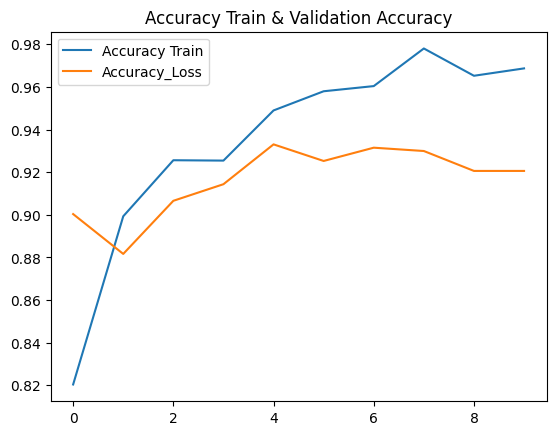

In [13]:
plt.plot(hist['accuracy'],label='Accuracy Train')
plt.plot(hist['val_accuracy'],label='Accuracy_Loss')
plt.title('Accuracy Train & Validation Accuracy')
plt.legend()

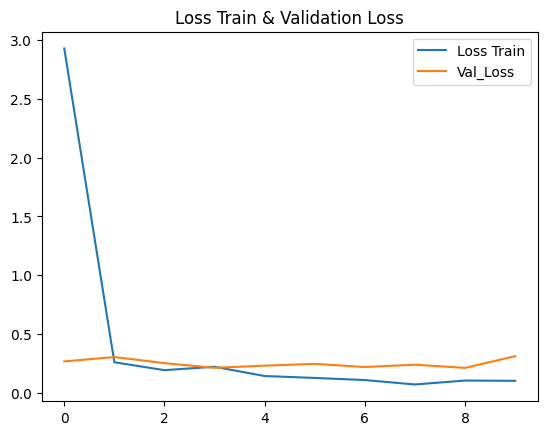

In [14]:
plt.plot(hist['loss'],label='Loss Train')
plt.plot(hist['val_loss'],label='Val_Loss')
plt.title('Loss Train & Validation Loss')
plt.legend()

In [15]:
score, acc = model.evaluate(X_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

36/36 [==============================] - 2s 60ms/step - loss: 0.3153 - accuracy: 0.9259
Test Loss = 0.31533461809158325
Test Accuracy = 0.9258605241775513


In [16]:
prediction = model.predict(X_test)
prediction

36/36 [==============================] - 2s 56ms/step


array([[9.9588567e-01, 4.1142977e-03],
       [9.9999857e-01, 1.4717708e-06],
       [1.9897388e-01, 8.0102611e-01],
       ...,
       [2.9731836e-02, 9.7026819e-01],
       [9.9949777e-01, 5.0223374e-04],
       [1.1356729e-05, 9.9998868e-01]], dtype=float32)

In [17]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['Prediction'])

Prediction
0     without mask
1     without mask
2        with mask
3     without mask
4        with mask
...            ...
1128  without mask
1129     with mask
1130     with mask
1131  without mask
1132     with mask

[1133 rows x 1 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

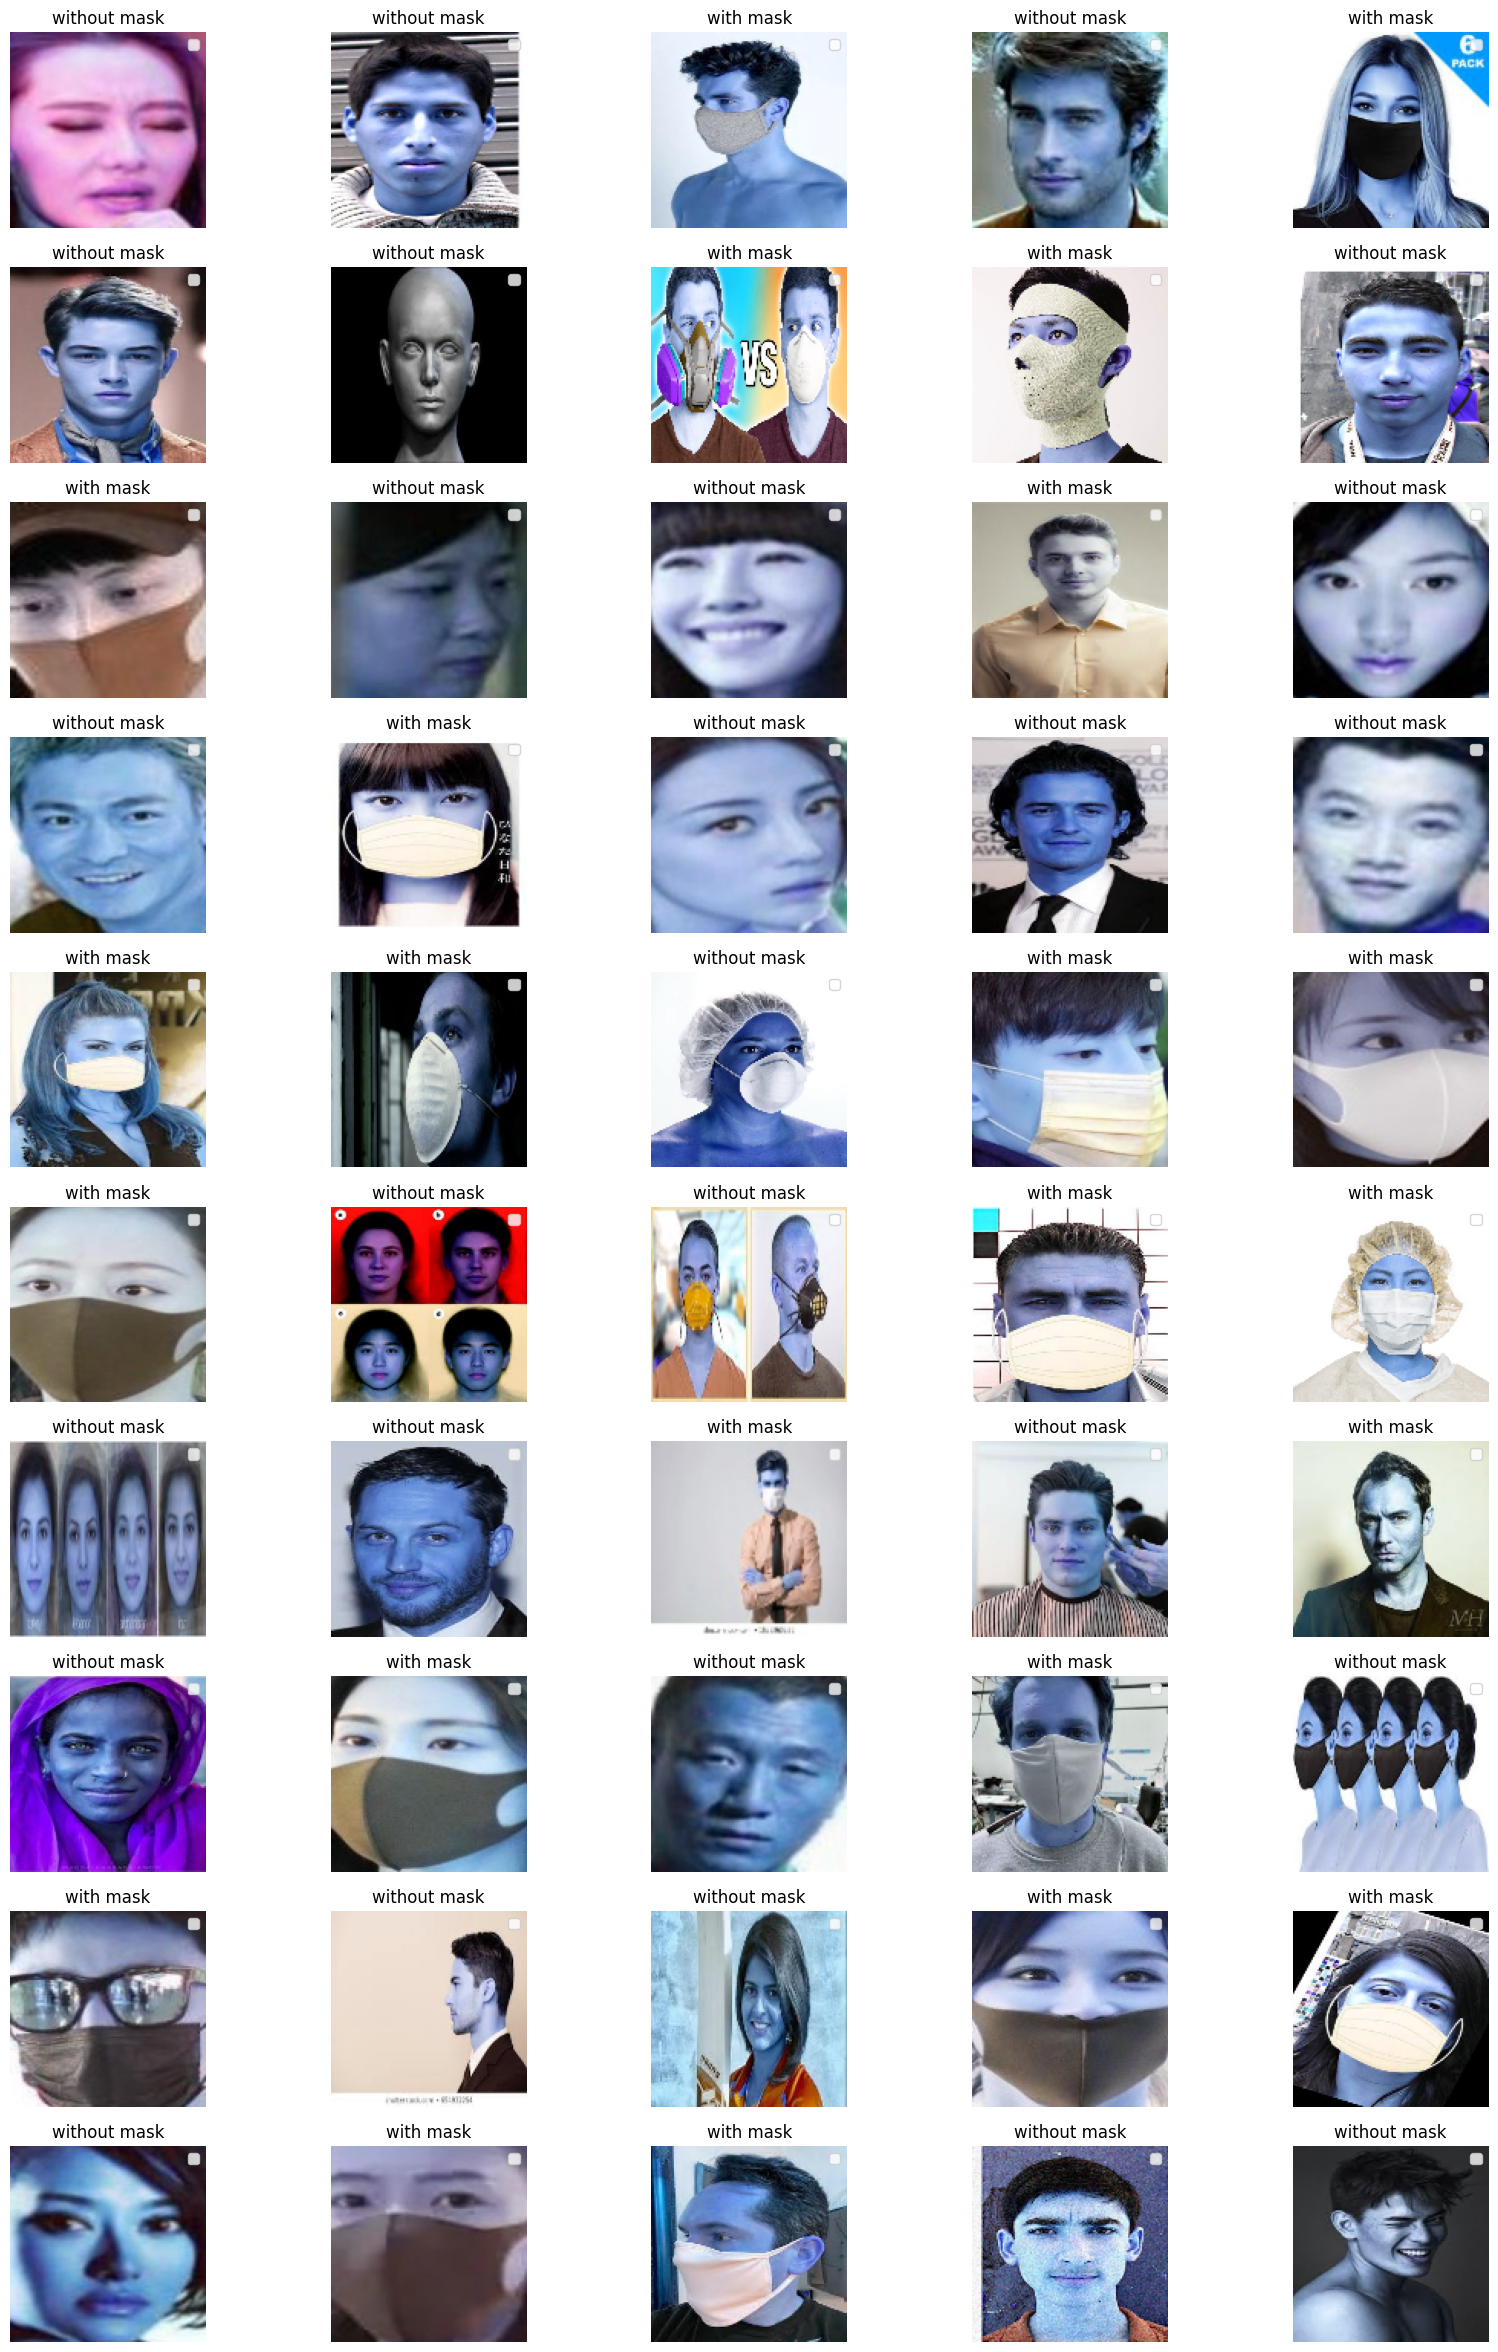

In [22]:
plt.figure(figsize=(20,30))
i=1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')

CALCULATING THE CONFUSION MATRIX

array([[564,  29],
       [ 55, 485]], dtype=int64)

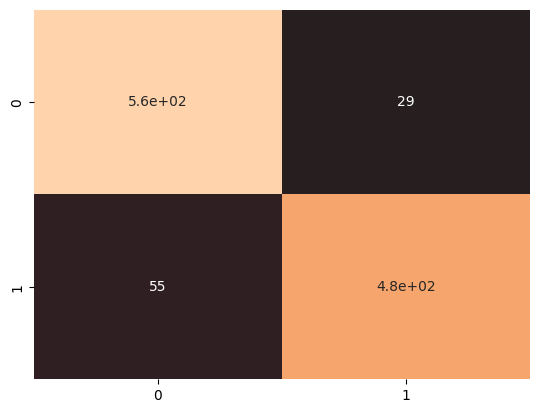

In [24]:
y_pred=[1 if m=='with mask' else 0 for m in pred_label]
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,annot=True,cbar=False)
CM
